# Project 3: Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway (between Minneapolis and Saint Paul
). The dataset that we are going to use for this project can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).<br><br>
Our analysis _goal_ is to determine indicators of heavy traffic on I-94. After prelucrating the data, we are going to use various exploratory data visualziation techniques to investigate data and find patterns.

![Image](https://s3.amazonaws.com/dq-content/524/i94_figma.png)

### Familiarzing with the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_traffic=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 4/Metro_Interstate_Traffic_Volume.csv")

Column name | Description  
---|---
holiday	|Categorical US National holidays plus regional holiday,<br> Minnesota State Fair.
temp|	Numeric Average temp in kelvin.
rain_1h|Numeric Amount in mm of rain that occurred in the hour.
snow_1h	|Numeric Amount in mm of snow that occurred in the hour.
clouds_all	|Numeric Percentage of cloud cover.
weather_main|	Categorical Short textual description of the current weather.
weather_description|	Categorical Longer textual description of the current weather.
date_time	|DateTime Hour of the data collected in local CST time.
traffic_volume	|Numeric Hourly I-94 ATR 301 reported westbound traffic volume.

In [3]:
print(df_traffic.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [4]:
print(df_traffic.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [5]:
print(df_traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


The dataset contains 9 columns, alongside 48204 rows. There are no null values.

### Analyzing Traffic Volume

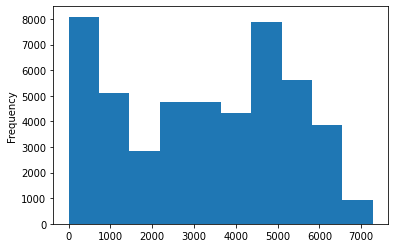

In [6]:
df_traffic["traffic_volume"].plot.hist()
plt.show()

In [7]:
df_traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Based on the histogram containing the distribution of the traffic_volume column and the statistics provided we can say that between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station (probably during the night). However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting path that could be researched more: contrasting daytime data with nighttime data.

### Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
df_traffic["date_time"]=pd.to_datetime(df_traffic["date_time"])
df_traffic_day=df_traffic[df_traffic["date_time"].dt.hour.between(7,19,inclusive='left')]
print(df_traffic_day)
df_traffic_night=df_traffic[(df_traffic["date_time"].dt.hour>=19)|(df_traffic["date_time"].dt.hour<7)]
print(df_traffic_night)

      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        None  288.28     0.00      0.0          40       Clouds   
1        None  289.36     0.00      0.0          75       Clouds   
2        None  289.58     0.00      0.0          90       Clouds   
3        None  290.13     0.00      0.0          90       Clouds   
4        None  291.14     0.00      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48194    None  283.84     0.00      0.0          75         Rain   
48195    None  283.84     0.00      0.0          75      Drizzle   
48196    None  284.38     0.00      0.0          75         Rain   
48197    None  284.79     0.00      0.0          75       Clouds   
48198    None  284.20     0.25      0.0          75         Rain   

           weather_description           date_time  traffic_volume  
0             scattered clouds 2012-10-02 09:00:00            5545  
1                broken clouds 2012-10-02 10:

Side-by-side traffic volume (for day and night) using a grid chart

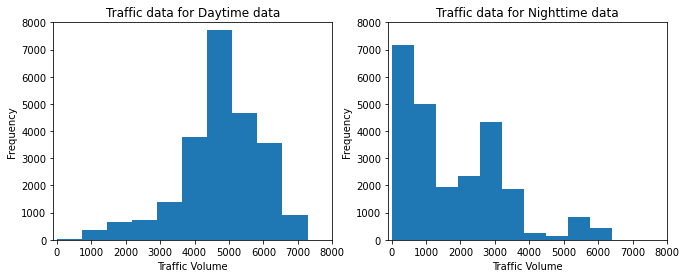

In [9]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.hist(df_traffic_day["traffic_volume"])
plt.title("Traffic data for Daytime data")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([-100,8000])
plt.ylim([0,8000])
plt.subplot(1,2,2)
plt.hist(df_traffic_night["traffic_volume"])
plt.title("Traffic data for Nighttime data")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([-100,8000])
plt.ylim([0,8000])
plt.show()

In [10]:
df_traffic_day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
df_traffic_night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The first histogram above indicates that the distribution of traffic volume during the day is left skewed, so most of the traffic volume is high during the day (there are 4,252 or more cars passing the station each hour 75% of the time as confirmed by the 25th percentile).<br>
The second histogram above indicates that the distribution of traffic volume during the night is right skewed, so most of the traffic volume is low during the night (there are less than 2,819 cars passing the station each hour 75% of the time as confirmed by the 75th percentile).<br>
From now on, we will only focus on the daytime data in our analysis.

### Time indicators

It seems like one of the possible indicators of heavy traffic is time. We will analyze it further to see how the traffic volume changes according to the following parameters:
* Month
* Day of the week
* Time of day

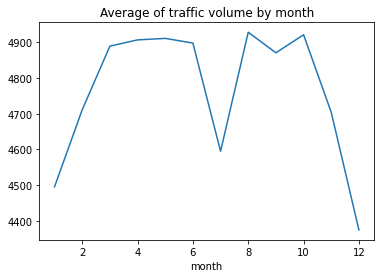

             temp   rain_1h   snow_1h  clouds_all  traffic_volume
month                                                            
1      265.483409  0.015080  0.000631   58.554108     4495.613727
2      266.663789  0.004019  0.000000   51.550459     4711.198394
3      273.619940  0.015839  0.000000   56.827811     4889.409560
4      279.661071  0.105343  0.000000   59.221525     4906.894305
5      289.282668  0.130863  0.000000   56.548825     4911.121609
6      294.576068  0.271121  0.000000   48.612374     4898.019566
7      296.785052  4.412258  0.000000   42.176619     4595.035744
8      295.119191  0.228113  0.000000   42.556892     4928.302035
9      292.520287  0.289807  0.000000   45.184112     4870.783145
10     284.081011  0.016065  0.000000   53.497990     4921.234922
11     276.698007  0.006200  0.000000   56.697187     4704.094319
12     267.727846  0.035365  0.002213   66.942237     4374.834566


In [12]:
month=list(df_traffic_day['date_time'].dt.month)
df_traffic_day.insert(9,"month",month)

by_month = df_traffic_day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.title("Average of traffic volume by month")
plt.show()
print(df_traffic_day.groupby('month').mean())

We notice from the line plot above an interesting exception: July. To see if traffic is significantly less heavy in July each year we will generate another plot to see how traffic volume changed each year in July.

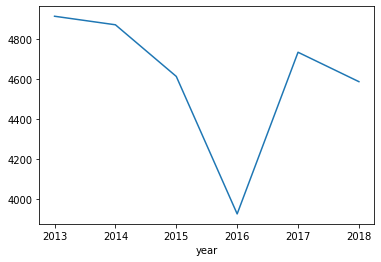

In [13]:
year=list(df_traffic_day['date_time'].dt.year)
df_traffic_day.insert(10,"year",year)

july = df_traffic_day[df_traffic_day['month'] == 7]

july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

It seems like traffic is usually heavy in July too, similar to the other summer months. 2016 was an exception, having a high decrease due to road construction. We can conclude that warm months usually have heavier traffic compared to cold months.

Let's divide the data further: by the __day of the week__.

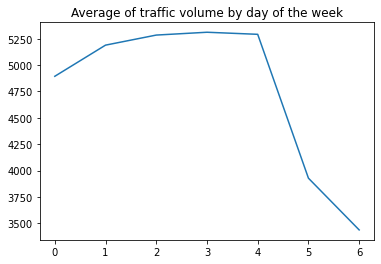

In [14]:
day_week=df_traffic_day['date_time'].dt.dayofweek
df_traffic_day.insert(11,"dayofweek",day_week)
by_dayofweek = df_traffic_day.groupby('dayofweek').mean()
plt.title("Average of traffic volume by day of the week")
plt.plot(by_dayofweek['traffic_volume'])
plt.show()


From the above plot we can see that traffic is lighter on weekends compared to business days.

Let's look no ar a more granular indicator:time of the day.We will separate business days and weekends.

In [15]:
hour=df_traffic_day['date_time'].dt.hour
df_traffic_day.insert(12,"hour",hour)
bussiness_days = df_traffic_day.copy()[df_traffic_day['dayofweek'] <= 4] 
weekend = df_traffic_day.copy()[df_traffic_day['dayofweek'] >= 5] 
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print("For business days:")
print(by_hour_business['traffic_volume'])
print("For weekends:")
print(by_hour_weekend['traffic_volume'])

For business days:
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
For weekends:
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


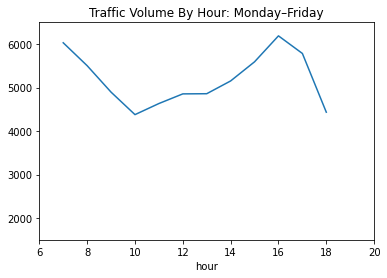

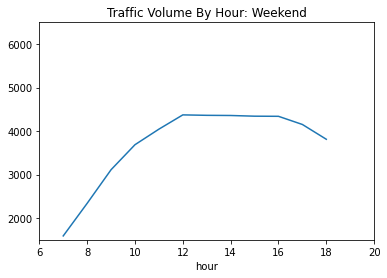

In [16]:
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume By Hour: Monday–Friday')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume By Hour: Weekend')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

During business days, the highest values are around 7 and 16 when most people travel to work and back (over 6,000 cars).
During weekends we see a regular trend, around 4000 during the day.

## Weather Indicators

Another potential indicator of heavy traffic is weather. The columns from the dataset that are related to weather are:temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

Correlation values between traffic_volume and other numerical columns:

In [17]:
df_traffic_day.corr()[["traffic_volume"]]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
year,-0.003557
dayofweek,-0.416453
hour,0.172704


From the weather columns the column with the strongest correlation is the temp column. We will use a scatter plot to visualize it.

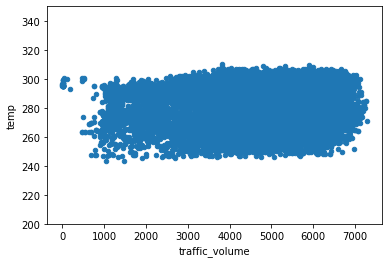

In [18]:
df_traffic_day.plot.scatter(x='traffic_volume', y='temp')
plt.ylim(200,350)
plt.show()

Temperature doesn't look like a reliable indicator of heavy traffic.The correlation is positive but is not significant. To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description

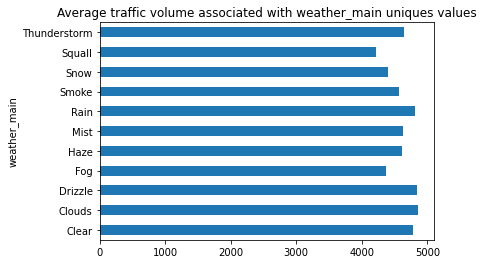

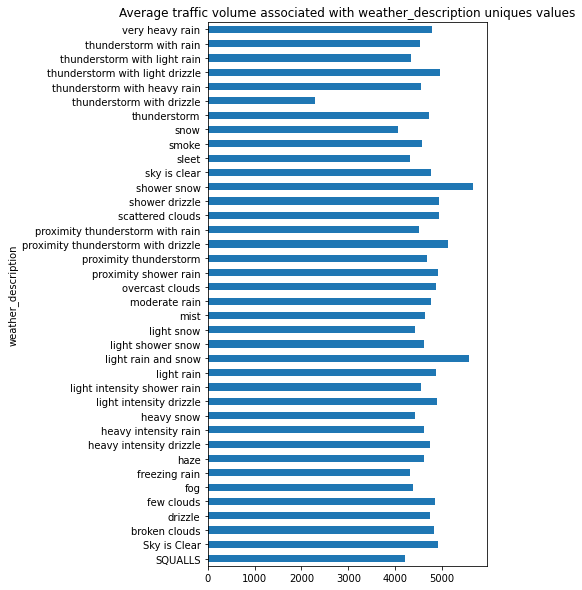

In [19]:
by_weather_main = df_traffic_day.groupby('weather_main').mean()
by_weather_description = df_traffic_day.groupby('weather_description').mean()
by_weather_main["traffic_volume"].plot.barh()
plt.title("Average traffic volume associated with weather_main uniques values")
plt.show()
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))
plt.title("Average traffic volume associated with weather_description uniques values")
plt.show()


For the weather_main column it looks like there is no wheater type where traffic volume exceeds on average 5,000 cars.
For the weather_description column it looks like light rain and snow and shower snow and priximity thunderstorm with drizzle are weather types where the traffic volume exceeds 5,000 cars on hour on average.

### Conclusion
To summarize, we found a few __time indicators__ of heavy traffic:

* The traffic is usually heavier during warm months compared to cold months.
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.
Also, some __weather indicators__ of heavy traffic are:
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle
